|First Name     |Last Name    |MtkNr.      |Due Date  | 
|:-------------:|:-----------:|:----------:|:--------:|
| Elias    | Mindlberger  | 12043382     | 20.01.2025, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 4 – 3D Reconstruction </h2>>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 30-10-2024

<b>This file is part of the "Computer Vision Course 2024W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Head-topic-1"><li style="font-size:large;font-weight:bold">Structure-from-Motion (SfM)</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-1-1"><li style="font-size:medium">Scene Reconstruction with COLMAP</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-1-2"><li style="font-size:medium">Analysis of Reconstruction Results</li></a>
</ol>
<a style="color:rgb(150,100,10)" href="#Head-topic-2"><li style="font-size:large;font-weight:bold">Light Fields</li></a>
    <ol style="margin-bottom:10px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-2-1"><li style="font-size:medium">Experiment 1</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-2-2"><li style="font-size:medium">Experiment 2</li></a>
</ol>
    <a style="color:rgb(150,100,10)" href="#Head-topic-3"><li style="font-size:large;font-weight:bold">Neural Radiance Fields</li></a>
    <ol style="margin-bottom:10px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-3-1"><li style="font-size:medium">Experiment 1</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-3-2"><li style="font-size:medium">Experiment 2</li></a>
</ol>
    
</ol>

<h1 style="color:rgb(255,0,0)">Important Note</h1>

<b>All cells must be evaluated, and any unevaluated cell may lead to a loss of points, regardless of the correctness of the code.</b>

In [1]:
from matplotlib import pyplot as plt
import os
import cv2
if not os.path.exists('resources'): raise TypeError("Please create the resources folder")

<a name="Head-topic-1"></a><h2>Structure-from-Motion (SfM)</h2>
    
The main goal is to utilize COLMAP for scene reconstruction. 

You need to download <i><b>COLMAP version 3.8</b></i> from [this link](https://github.com/colmap/colmap/releases). After downloading, you can use <i><b>COLMAP.bat</b></i> to start the program.

Additionally, download the <i><b>south-building</b></i> dataset from [this link](https://demuc.de/colmap/datasets/).

<a name="Sub-Head-topic-1-1"></a><h3>Scene Reconstruction with COLMAP</h3>

<b>Exercise 1.1. [20 Points]</b>
   
<b>Goal:</b> The aim is to reconstruct a 3D model from the <i><b>south-building</b></i> dataset using the default parameters of COLMAP.

<b>Task</b>
<ul>

<li>Use the <i><b>128 images</b></i> provided and apply the default parameters of COLMAP.</li>
<li>Capture snapshots of the reconstructed scene from <i><b>three different perspectives</b></i> (e.g., front view, side view, and top view).</li>
</ul>

<b>Hint</b>
<ul> 
<li>You must save the snapshot in the <i><b>resources folder</b></i> with <b><i>.jpg</b></i> extension, then run the <i><b>draw_snapshots</b></i> function below to show the images.</li>
<li><span style="color:rgb(220,10,10)">Name your snapshots as follows: image_1,  image_2, and image_3.</span></li>
<li><span style="color:rgb(220,10,10)">The reconstruction process may take some time.</span></li>
</ul>


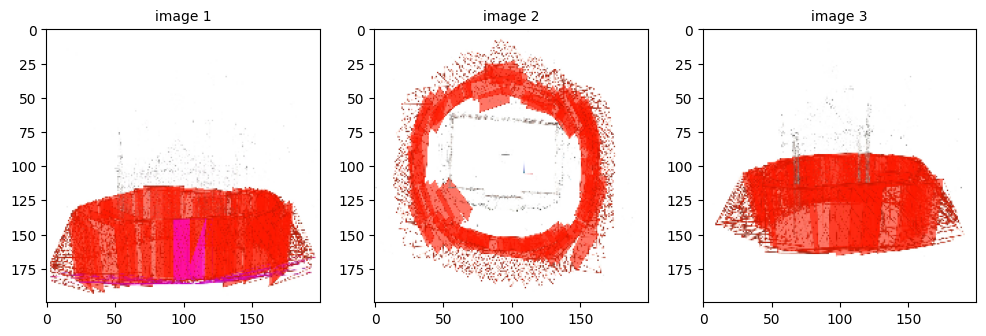

In [2]:
# After saving all snapshots, run this cell to show the snapshots

def draw_snapshots(img1 = 'resources/image_1.jpg', img2 = 'resources/image_2.jpg', img3 = 'resources/image_3.jpg'):
    size = (200, 200)
    
    img1 = cv2.cvtColor(cv2.imread(img1),cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(img2),cv2.COLOR_BGR2RGB)
    img3 = cv2.cvtColor(cv2.imread(img3),cv2.COLOR_BGR2RGB)
    
    img1 = cv2.resize(img1, size )
    img2 = cv2.resize(img2, size )
    img3 = cv2.resize(img3, size )
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('image 1', size=10),

    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('image 2', size=10),

    ax[2].imshow(img3, cmap='gray')
    ax[2].set_title('image 3', size=10),

    plt.show()

draw_snapshots()

<a name="Sub-Head-topic-1-2"></a><h3>Analysis of Reconstruction results</h3>

<b>Exercise 1.2. [30 Points]</b>

<b>Goal:</b> Now, let's analyze the result from <i><b>Exercise 1.1</b><i>. Look at the final values shown on the log screen on the right. Here, you will find a number called <i><b>final cost</b><i>.

<b>Question</b>
<ul>
<li>What does this error mean?</li>
<li>How does COLMAP determine this error?</li>
<li>Would you get the same or a different error if you repeat the experiment, and why?</li>
</ul>

#### Your answer goes here #### 
In COLMAP the "final cost" or "final error" refers to the final reprojection error after bundle adjustment. This error measures how far (in expectation, average) the reconstruction (in 3D) are from the original features (in 2D) when reprojected. A lower final cost means that the reconstruction is at least consistent with the input images.

COLMAP determines this error by comparing the 3D points with the 2D features in the images. The error is calculated by the difference between the 2D features and the 3D points projected back to the 2D image plane. The final cost is the sum of all these errors.

If we repeat the experiment, we would get a different error because the initial values of the camera poses and 3D points are randomly initialized. This randomness leads to different results in the optimization process. The final cost is a result of the optimization process, and the optimization process is non-deterministic. Therefore, the final cost will be different each time we run the experiment.

<a name="Head-topic-2"></a><h2>Light Fields</h2>

In the second part, we apply a simple light-field viewer. Please find it [here](https://hypothete.github.io/lightfield-webgl2/). Note that we have not talked about this in the lecture, and you need to do some background investigations yourself. Light-fields are related to Neural Radiance Fields (NeRFs), which were discussed in the lecture. You will explore this relationship here.


Light-field rendering is image-based rendering. The pioneering paper is from 1996 (please read this paper, and/or research the internet to understand the principles of light-field rendering):
https://graphics.stanford.edu/papers/light/light-lores.pdf

<a name="Sub-Head-topic-2-1"></a><h3>Experiment 1</h3>

<b>Exercise 2.1. [10 Points]</b>

<b>Goal:</b> Use the light-field viewer to explore how the images change when you change the aperture from narrow to wide<i>.

<b>Question</b>
<ul>
<li>What differences do you observe in the results when the aperture is wide compared to the result when the aperture is narrow?</li>
<li>What differences do you observe in the results when you change the focus?</li>
<li>Why don't you see any focus changes when the aperture is narrow?</li>
</ul>

#### Your answer goes here #### 

When the aperture is wide, the depth of field is shallow, and the background is blurred. When the aperture is narrow, the depth of field is deep, and the background is sharp. The wide aperture results in a more blurred background, while the narrow aperture results in a sharper background.

When the focus is changed, the focus point changes. The objects that are in focus are sharp, while the objects that are out of focus are blurred. The focus point is the point where the light rays converge.

When the aperture is narrow, the depth of field is deep, and the focus point is not as critical as when the aperture is wide. The depth of field is the range of distances within which objects appear sharp. When the aperture is narrow, the depth of field is large, and the focus point is less critical. Therefore, the focus changes are not as visible when the aperture is narrow.

<a name="Sub-Head-topic-2-2"></a><h3>Experiment 2</h3>

<b>Exercise 2.2. [15 Points]</b>

<b>Goal:</b> Now set the aperture to full width and change the focus to maximal (front / rear) distances. You observe image artifacts in the out-of-focus regions<i>.

<b>Question</b>
<ul>
<li>Why do these image artifacts appear?</li>
<li>What could you do by re-recording the light field to reduce such artifacts?</li>
<li>What could you do without re-recording the light field to reduce such artifacts?</li>
<li>Do you see a relationship between NeRFS and light-field?</li>
</ul>

#### Your answer goes here #### 

Artifacts appear in the out-of-focus regions because the light rays are not focused on the image plane. The artifacts are caused by the defocus blur, which is the result of the light rays not converging on the image plane. The defocus blur is the result of the light rays converging in front of or behind the image plane.

By re-recording the light field, we could reduce the artifacts by changing the focus point. By focusing the light rays on the image plane, we can reduce the defocus blur and the artifacts in the out-of-focus regions.

Without re-recording the light field, we could reduce the artifacts by using image-based rendering techniques. These techniques can be used to simulate the defocus blur and reduce the artifacts in the out-of-focus regions.

NeRFs and light fields are related because they both represent the 3D scene using 2D images. NeRFs represent the 3D scene using a neural network, while light fields represent the 3D scene using a set of 2D images. Both methods can be used for 3D reconstruction and rendering.

<a name="Head-topic-3"></a><h2>Neural Radiance Fields</h2>
Let's now look at NeRFs in the third part of this assignment (you have learned about them in the lecture). Here is an online viewer and several sample scenes: https://nervv.tech/
Explore these scenes with the viewer.

<a name="Sub-Head-topic-3-1"></a><h3>Experiment 1</h3>

<b>Exercise 3.1. [10 Points]</b>

<b>Goal:</b> Investigate the differences between Light Fields and Neural Radiance Fields (NeRFs)<i>.

<b>Question</b>
<ul>
<li>What are the advantages and disadvantages of NeRF over Light Fields. Provide at least one pro and one contra argument for using NeRFs?</li>
</ul>

#### Your answer goes here #### 

NeRFs over light field Pro: NeRFs can represent the 3D scene with higher accuracy than light fields. NeRFs can model the scene with high resolution and capture the fine details of the scene.

Contra: NeRFs require more computational resources than light fields. NeRFs require a large amount of memory and processing power to train the neural network. NeRFs are computationally expensive and time-consuming to train.

<a name="Sub-Head-topic-3-2"></a><h3>Experiment 2</h3>

<b>Exercise 3.2. [15 Points]</b>

<b>Goal:</b> Explore NeRF reconstructions.<i>.

<b>Question</b>
<ul>
<li>Why is it possible to observe reconstructed points inside the objects (considering that only their outside surfaces are captured in the input images)? Are these reconstructions any meaningful or correct? </li>
</ul>

<b>Hint</b>
<ul>
<li>The correct answer is not trivial or straightforward!</li>
</ul>

#### Your answer goes here ####

NeRFs model a volumetric function of color and opacity across all points in three-dimensional space, including those that are never directly observed. Because interior regions receive little to no observational constraint, their reconstructed details often lack physical significance and merely provide one of many plausible explanations for the visible outer surfaces. In contrast, traditional light fields only describe how light propagates along rays in free space, without encoding any volumetric information inside objects.